In [1]:
import os
import cv2
import json
import shutil

import numpy as np

from glob import glob

import matplotlib.pyplot as plt

# Crop Images and Jsons

In [2]:
raw_image_path = "C:/Users/frank/OneDrive/Desktop/GT_Practicum/data/AI+/External_test/imgs/"
raw_image_list = glob(os.path.join(raw_image_path, "*.jpg"))
raw_image_list.sort()
print(len(raw_image_list))

239


In [3]:
raw_json_path = "C:/Users/frank/OneDrive/Desktop/GT_Practicum/data/AI+/External_test/jsons_updated/"
raw_json_list = glob(os.path.join(raw_json_path, "*.json"))
raw_json_list.sort()
print(len(raw_json_list))

239


In [4]:
with open (raw_json_list[0]) as f:
    data = json.load(f)

In [5]:
data

{'version': '5.0.1',
 'flags': {},
 'shapes': [{'label': 1,
   'points': [[303.46031746031747, 145.23809523809524],
    [683.6190476190476, 400.7936507936508]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'border',
   'points': [[229.65079365079367, 121.42857142857143],
    [804.2539682539682, 665.0793650793651]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '01E6C75C2D5E418DAB90F7562CA4083B_2645110.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAMABAADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+

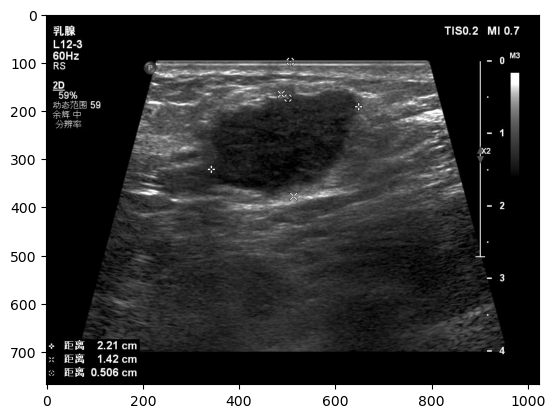

In [8]:
img = cv2.imread(raw_image_list[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [16]:
with open (raw_json_list[0]) as f:
    data = json.load(f)

height, weidth = img.shape[:2]

assert height == data["imageHeight"]
assert weidth == data["imageWidth"]

shape_list = []

for shape in data["shapes"]:
    if shape["label"] == "border":

        x0 = int(shape["points"][0][0])
        y0 = int(shape["points"][0][1])
        x1 = int(weidth - shape["points"][1][0])
        y1 = int(height - shape["points"][1][1])

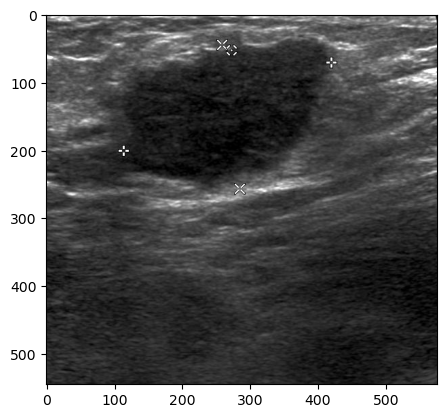

In [20]:
img_crop = img[y0:-y1, x0:-x1, :]
# img_crop = img[y1:-y0, x1:-x0, :]
plt.imshow(img_crop)

In [25]:
img_cropped_path = "C:/Users/frank/OneDrive/Desktop/GT_Practicum/data/AI+/External_test_cropped/imgs/"
json_cropped_path = "C:/Users/frank/OneDrive/Desktop/GT_Practicum/data/AI+/External_test_cropped/jsons/"

for raw_image, raw_json in zip(raw_image_list, raw_json_list):
    assert os.path.basename(raw_image)[:-4] == os.path.basename(raw_json)[:-5]
    
    img = cv2.imread(raw_image)
    
    with open (raw_json) as f:
        data = json.load(f)
    
    height, weidth = img.shape[:2]

    assert height == data["imageHeight"]
    assert weidth == data["imageWidth"]
    
    shape_list = []

    for shape in data["shapes"]:
        if shape["label"] == "border":

            x0 = int(shape["points"][0][0])
            y0 = int(shape["points"][0][1])
            x1 = int(weidth - shape["points"][1][0])
            y1 = int(height - shape["points"][1][1])

    for shape in data["shapes"]:
        if shape["label"] == 0:
            shape["label"] = "benign"
            shape["points"][0][0] = shape["points"][0][0] - x0
            shape["points"][0][1] = shape["points"][0][1] - y0
            shape["points"][1][0] = shape["points"][1][0] - x0
            shape["points"][1][1] = shape["points"][1][1] - y0

            shape_list.append(shape)
        elif shape["label"] == 1:
            shape["label"] = "malignant"
            shape["points"][0][0] = shape["points"][0][0] - x0
            shape["points"][0][1] = shape["points"][0][1] - y0
            shape["points"][1][0] = shape["points"][1][0] - x0
            shape["points"][1][1] = shape["points"][1][1] - y0
            shape_list.append(shape)
    
    img_crop = img[y0:-y1, x0:-x1, :]

    img_save_path = os.path.join(img_cropped_path, os.path.basename(raw_image))
    cv2.imwrite(img_save_path, img_crop)

    data_cropped = {'version': '5.0.1',
                    'flags': {},
                    'shapes': shape_list,
                    'imagePath': os.path.basename(raw_image),
                    'imageData': None,
                    'imageHeight': height,
                    'imageWidth': weidth}
    
    json_save_path = os.path.join(json_cropped_path, os.path.basename(raw_json))
    with open(json_save_path, 'w') as f:
        json.dump(data_cropped, f)

# Fixing Labels in Jsons

In [2]:
et_json_path = "C:/Users/frank/OneDrive/Desktop/GT_Practicum/data/AI+/External_test/jsons_updated/"

et_json_list = glob(os.path.join(et_json_path, "*.json"))
print(len(et_json_list))

239


In [3]:
for json_path in et_json_list:
    with open (json_path) as f:
        data = json.load(f)

    for shape in data["shapes"]:
        if shape["label"] == 0:
            shape["label"] = "benign"
        elif shape["label"] == 1:
            shape["label"] = "malignant"

    with open(json_path, 'w') as f:
        json.dump(data, f)